<a href="https://colab.research.google.com/github/Bizzzzan/5005CMD_project/blob/main/5004_Q1)a)_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week
0     20976.786952
1     20071.310863
2     19897.342408
3     19889.436675
4     20096.313462
5     19757.425989
6     19599.069548
7     20033.597170
8     19741.670867
9     20043.095149
10    19826.900589
11    20264.390629
12    20632.226251
13    20792.383279
14    21064.024586
15    21375.296433
16    20066.291118
17    19666.744804
18    20020.237718
19    19679.550872
20    19881.386992
22    19897.745108
23    20503.628696
24    20571.770526
25    20088.389972
21    20060.819541
26    20823.985153
27    20249.929104
28    20038.482247
29    20758.966759
30    20662.342080
31    20285.019485
32    19052.686234
33    18745.051412
34    18890.033421
35    20627.338011
36    19918.284514
37    20077.207573
38    20648.268011
39    21323.439768
40    21132.913589
41    21656.941398
42    21958.423366
43    21998.566027
44     7465.212121
Name: Population Staying at Home, dtype: float64
time: 9.805659055709839  seconds


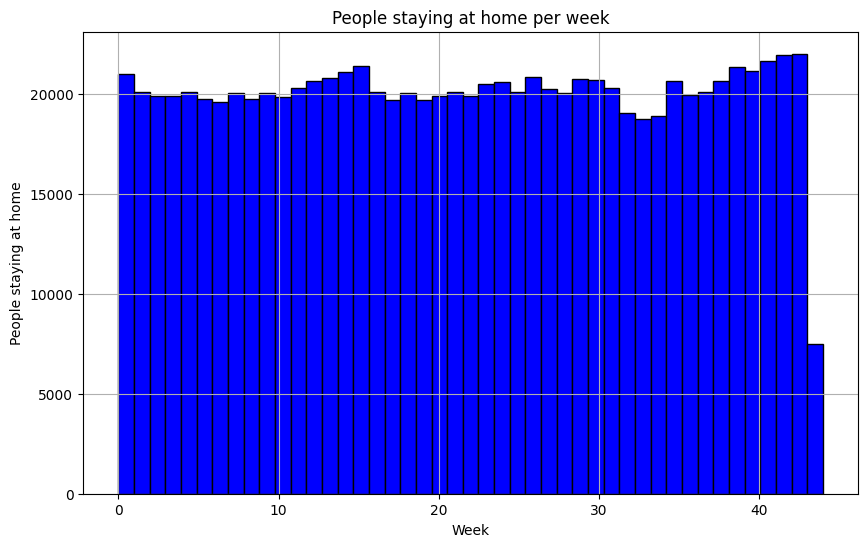

In [ ]:
#How many people stay at home per week
#import libaries
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import time

#define datatypes for each column
dtype={'County Name': 'object',
       'Number of Trips': 'float64',
       'Number of Trips 1-3': 'float64',
       'Number of Trips 10-25': 'float64',
       'Number of Trips 100-250': 'float64',
       'Number of Trips 25-50': 'float64',
       'Number of Trips 250-500': 'float64',
       'Number of Trips 3-5': 'float64',
       'Number of Trips 5-10': 'float64',
       'Number of Trips 50-100': 'float64',
       'Number of Trips <1': 'float64',
       'Number of Trips >=500': 'float64',
       'Population Not Staying at Home': 'float64',
       'Population Staying at Home': 'float64',
       'State Postal Code': 'object'}

#start timer
start = time.time()

#read dataset
df = dd.read_csv("/content/Trips_by_Distance (1).csv", dtype=dtype)

#data cleaning
cleaned_df = df.dropna()

#ensure there's only unique values in the week column
cleaned_df['Week'].nunique().compute()

#group the average population staying at home per week
weekly_non_travellers = cleaned_df.groupby(by='Week')['Population Staying at Home'].mean().compute()
print(weekly_non_travellers)

#end timer
dask_time = time.time() - start
print("time:", dask_time, " seconds")

#plot histogram
plt.figure(figsize=(10, 6))
plt.hist(weekly_non_travellers.index,
         weights=weekly_non_travellers.values,
         bins=len(weekly_non_travellers),
         color='blue', edgecolor='black')
plt.xlabel("Week")
plt.ylabel("People staying at home")
plt.title("People staying at home per week")
plt.grid()
plt.show()




              Trips <1 Mile  Trips 1-3 Miles  Trips 10-25 Miles  \
Week of Date                                                      
Week 32        3.259764e+08     3.694767e+08        231078511.0   

              Trips 100-250 Miles  Trips 25-50 Miles  Trips 250-500 Miles  \
Week of Date                                                                
Week 32                 6850130.0       6.915913e+07            1829242.0   

              Trips 3-5 Miles  Trips 5-10 Miles  Trips 50-100 Miles  \
Week of Date                                                          
Week 32          1.815558e+08       233444464.0        1.887832e+07   

              Trips 500+ Miles  
Week of Date                    
Week 32           3.443101e+06  
time: 0.10389089584350586  seconds
  Week of Date  Distance         Trips
0      Week 32       0.5  3.259764e+08
1      Week 32       2.0  3.694767e+08
2      Week 32      17.5  2.310785e+08
3      Week 32     175.0  6.850130e+06
4      Week 32      37.

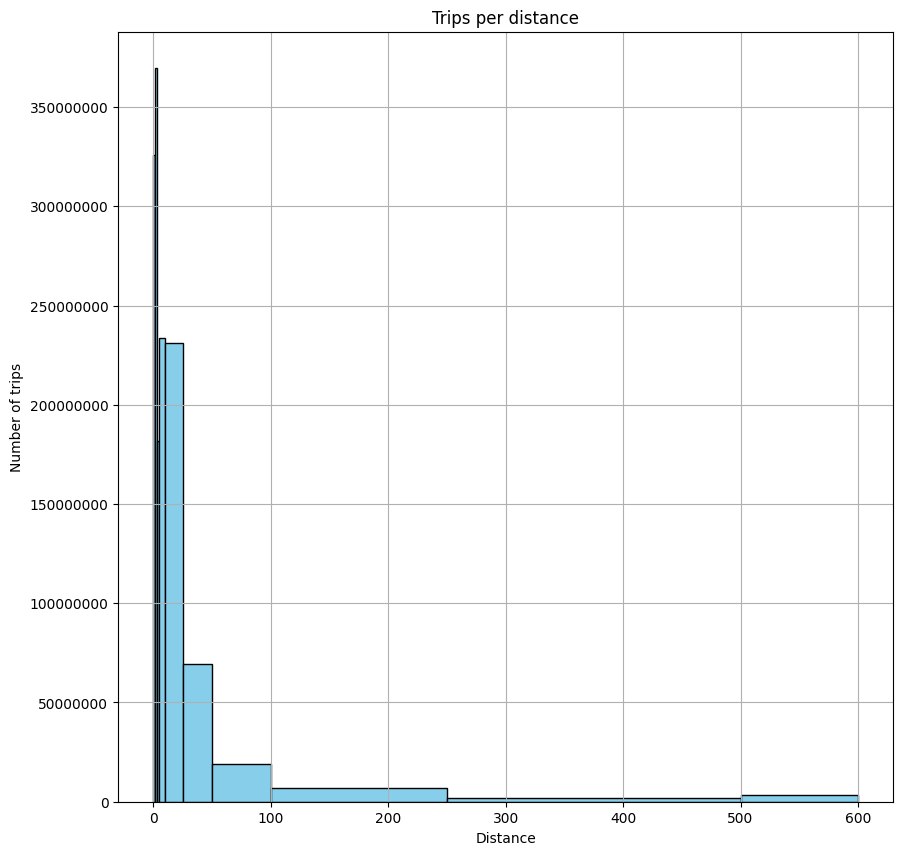

In [ ]:
#How far are people traveling when they don’t stay at home?

#get the midpoints between the mile ranges for each column
distance_midpoints = {
    'Trips <1 Mile': 0.5,
    'Trips 1-3 Miles': 2,
    'Trips 3-5 Miles': 4,
    'Trips 5-10 Miles': 7.5,
    'Trips 10-25 Miles': 17.5,
    'Trips 25-50 Miles': 37.5,
    'Trips 50-100 Miles': 75,
    'Trips 100-250 Miles': 175,
    'Trips 250-500 Miles': 375,
    'Trips 500+ Miles': 600
}

#start timer
start = time.time()

#read dataset
df_full = dd.read_csv("/content/Trips_Full Data (2).csv")

#ensure there's only unique values in the week column
df_full['Week of Date'].nunique().compute()

#group how far the average population is travelling
peopleTravellingVsDistance = df_full.groupby(by = 'Week of Date')['Trips <1 Mile', 'Trips 1-3 Miles',
'Trips 3-5 Miles', 'Trips 5-10 Miles', 'Trips 10-25 Miles', 'Trips 25-50 Miles', 'Trips 50-100 Miles',
'Trips 100-250 Miles', 'Trips 250-500 Miles', 'Trips 500+ Miles'].mean().compute()
print(peopleTravellingVsDistance)

#end timer
dask_time = time.time() - start
print("time:", dask_time, " seconds")

#transforms dataframe into long format
peopleTravellingVsDistance = peopleTravellingVsDistance.reset_index()
peopleTravellingVsDistance_melted = peopleTravellingVsDistance.melt(id_vars=['Week of Date'], var_name='Distance', value_name='Trips')

#replace the miles columns with their corresponding midpoints
peopleTravellingVsDistance_melted['Distance'] = peopleTravellingVsDistance_melted['Distance'].map(distance_midpoints)
print(peopleTravellingVsDistance_melted)

#plot histogram
plt.figure(figsize=(10, 10))
plt.hist(peopleTravellingVsDistance_melted['Distance'],
         weights=peopleTravellingVsDistance_melted['Trips'],
         bins=[0,1,3,5,10,25,50,100,250,500,600], color='skyblue',
         edgecolor='black')
plt.ticklabel_format(style='plain')
plt.xlabel("Distance")
plt.ylabel("Number of trips")
plt.title("Trips per distance")
plt.grid()
plt.show()